In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Load Generator
G = torch.load('./trained_model/G.pth', map_location=torch.device('cpu'))

In [80]:
def im_convert(tensor):
    """
    Display a tensor as an image. 

    Parameter:
        tensor  (tensor): image in tensor dtype.

    Return:
        image   (numpy array)
    """
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

In [89]:
# Generate two random vectors with dimension nz=128
z1 = torch.empty(1, 64).uniform_(-1, 1)
z2 = torch.empty(1, 64).uniform_(-1, 1)
# Generate interpolation weights
interp = np.linspace(0,1,11)

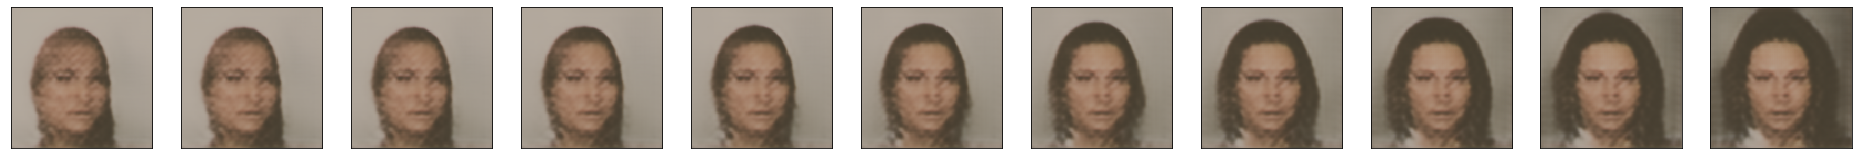

In [90]:
# Visualize the interpolation
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(33, 3),
                        subplot_kw={'xticks': [], 'yticks': []})
for ax, alpha in zip(axs.flat, interp):
    z_ = alpha*z1 + (1-alpha)*z2
    f = G(z_)
    f_img = im_convert(f)
    ax.imshow(f_img)